- https://www.kaggle.com/lextoumbourou/humpback-whale-id-data-and-aug-exploration

In [2]:
import math
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

In [13]:
%matplotlib inline

INPUT_DIR='M:/dataset/Whale_Identification'

# plt.imread(f'{INPUT_DIR}/train/{filename}')


In [75]:

def plot_images(imgs,labels,rows=4):
    figure=plt.figure(figsize=(13,8))
    cols=len(imgs)//rows+1
    for i in range(len(imgs)):
        subplot=figure.add_subplot(rows,cols,i+1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i],fontsize=16)
        plt.imshow(imgs[i],cmap='gray')
    
    
def plot_image_for_filenames(filenames,labels,rows=4):
    #imgs = [ plt.imread(INPUT_DIR+'/train/'+ filename for filename in filenames]  # f前缀-查资料发现原来是Python3.6之后新加的功能。
    print(filenames)
    imgs=[]
    for filename in filenames:
        #print(type(INPUT_DIR),type(filename),filename)
        # print(INPUT_DIR+'/train/'+ filename)
        img=plt.imread(INPUT_DIR+'/train/'+ filename)
        print(img.shape)
        imgs.append(img)
       
    return plot_images(imgs,labels,rows)



In [76]:
np.random.seed(42)
train_df=pd.read_csv(INPUT_DIR+'/train.csv')
train_df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [77]:
rand_rows=train_df.sample(frac=1.)[:20]
imgs=list(rand_rows['Image'])
print(imgs)
labels=list(rand_rows['Id'])
print(len(imgs))


['e871b226.jpg', 'ffbca206.jpg', '3054d682.jpg', 'a49b519c.jpg', 'dd5bcda3.jpg', '0a254aa7.jpg', 'e5d8bc42.jpg', 'a584067a.jpg', 'bad83ce8.jpg', 'db9e8d8f.jpg', '4f447f94.jpg', 'a0d45211.jpg', 'a451963f.jpg', '9e365d39.jpg', '9b1232a8.jpg', 'cebf233a.jpg', 'c6f8ee24.jpg', '02a66def.jpg', 'b8f8c2c9.jpg', '00b588d6.jpg']
20


['e871b226.jpg', 'ffbca206.jpg', '3054d682.jpg', 'a49b519c.jpg', 'dd5bcda3.jpg', '0a254aa7.jpg', 'e5d8bc42.jpg', 'a584067a.jpg', 'bad83ce8.jpg', 'db9e8d8f.jpg', '4f447f94.jpg', 'a0d45211.jpg', 'a451963f.jpg', '9e365d39.jpg', '9b1232a8.jpg', 'cebf233a.jpg', 'c6f8ee24.jpg', '02a66def.jpg', 'b8f8c2c9.jpg', '00b588d6.jpg']
(700, 1050, 3)
(397, 1050, 3)
(600, 1050)
(229, 624, 3)
(301, 1050, 3)
(466, 1050, 3)
(705, 970)
(297, 1050, 3)
(700, 1050, 3)
(667, 1000, 3)
(333, 1050, 3)
(591, 1050, 3)
(298, 838, 3)
(558, 792, 3)
(359, 699)
(321, 1050, 3)
(700, 1050, 3)
(339, 1050, 3)
(584, 1038)
(500, 875)
['e871b226.jpg', 'ffbca206.jpg', '3054d682.jpg', 'a49b519c.jpg', 'dd5bcda3.jpg', '0a254aa7.jpg', 'e5d8bc42.jpg', 'a584067a.jpg', 'bad83ce8.jpg', 'db9e8d8f.jpg', '4f447f94.jpg', 'a0d45211.jpg', 'a451963f.jpg', '9e365d39.jpg', '9b1232a8.jpg', 'cebf233a.jpg', 'c6f8ee24.jpg', '02a66def.jpg', 'b8f8c2c9.jpg', '00b588d6.jpg']


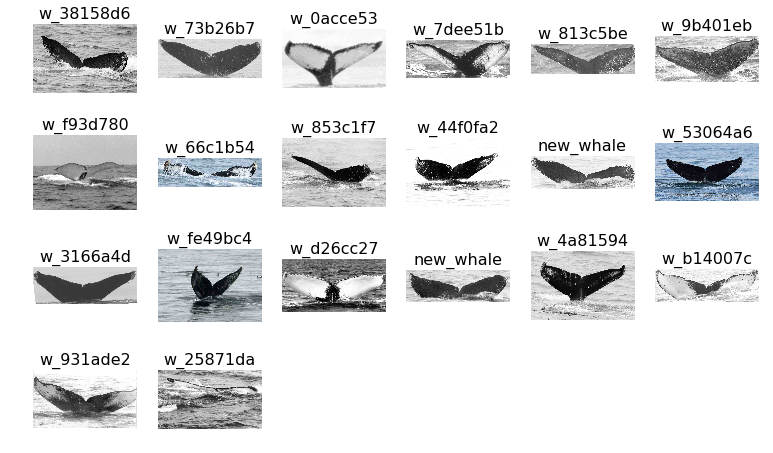

In [78]:
plot_image_for_filenames(imgs,labels)
print(imgs)

In [80]:
num_categories=len(train_df['Id'].unique())
print('Number of categories : '+ str(num_categories))

Number of categories : 4251


In [82]:
size_buckets=Counter(train_df['Id'].value_counts().values)
print(size_buckets)

Counter({1: 2220, 2: 1034, 3: 492, 4: 192, 5: 102, 6: 61, 7: 40, 8: 23, 9: 21, 10: 9, 13: 9, 11: 7, 12: 7, 14: 5, 16: 5, 15: 4, 17: 4, 21: 3, 22: 3, 18: 2, 19: 2, 20: 1, 23: 1, 26: 1, 27: 1, 34: 1, 810: 1})


- New whale is the biggest category with 810, followed by w_1287fbc. New whale, I believe, is any whale that isn't in scientist's database. Since we can pick 5 potential labels per id, it's probably going to make sense to always include new_whale in our prediction set, since there's always an 8.2% change that's the right one. Let's take a look at one of the classes, to get a sense what flute looks like from the same whale.
- It's very difficult to build a validation set when most classes only have 1 image, so my thinking is to perform some aggressive data augmentation on the classes with < 10 images before creating a train/validation split. Let's take a look at a few examples of whales with only one example.


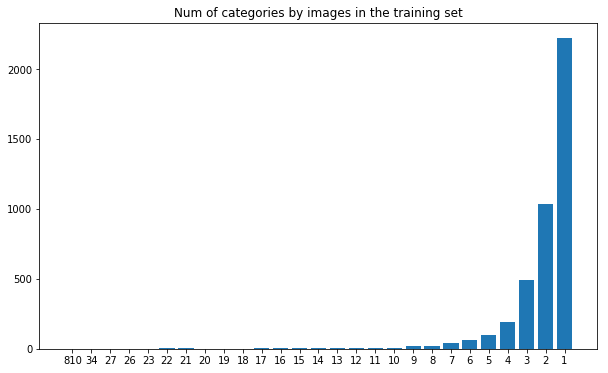

In [83]:
plt.figure(figsize=(10, 6))

plt.bar(range(len(size_buckets)), list(size_buckets.values())[::-1], align='center')
plt.xticks(range(len(size_buckets)), list(size_buckets.keys())[::-1])
plt.title("Num of categories by images in the training set")

plt.show()

In [84]:
train_df['Id'].value_counts().head(3)

new_whale    810
w_1287fbc     34
w_98baff9     27
Name: Id, dtype: int64

In [86]:
total = len(train_df['Id'])
print('Total images in training set {total}'+ str(total))

Total images in training set {total}9850


In [89]:
w_1287fbc=train_df[train_df['Id']=='w_1287fbc']
print(len(w_1287fbc))

34


['000466c4.jpg', '0603a403.jpg', '13503533.jpg', '1f2913e3.jpg', '2c3b34a3.jpg', '2c4813a1.jpg', '3cdd7fa7.jpg', '40abf606.jpg', '445c2164.jpg', '4604b292.jpg', '514cf008.jpg', '6d82e3d0.jpg', '7060ba65.jpg', '71a4fc90.jpg', '738fb42a.jpg', '8305abbf.jpg', '871d522d.jpg', '87649728.jpg', '8f1fb719.jpg', '8f2b69b8.jpg', '91052943.jpg', '91b704dc.jpg', '97f7fb07.jpg', 'a7d28984.jpg', 'af823c5a.jpg', 'b5f01672.jpg', 'c72123ef.jpg', 'ce6abadc.jpg', 'd02b1784.jpg', 'd040e670.jpg', 'db147df2.jpg', 'e19655a4.jpg', 'ed284e79.jpg', 'f5ac7c84.jpg']
(700, 1050, 3)
(571, 1050, 3)
(340, 1050, 3)
(342, 1050, 3)
(177, 788, 3)
(288, 1050, 3)
(177, 788, 3)
(556, 1050, 3)
(375, 1050, 3)
(244, 1050, 3)
(390, 1050, 3)
(355, 1050, 3)
(261, 1050, 3)
(272, 1050, 3)
(531, 1050, 3)
(179, 696, 3)
(358, 987, 3)
(324, 1050, 3)
(309, 1050, 3)
(379, 1050, 3)
(367, 1050, 3)
(336, 1050, 3)
(350, 612, 3)
(331, 1050, 3)
(313, 1050, 3)
(437, 1050, 3)
(296, 1050, 3)
(700, 1050, 3)
(369, 1050, 3)
(245, 1050, 3)
(336, 1050

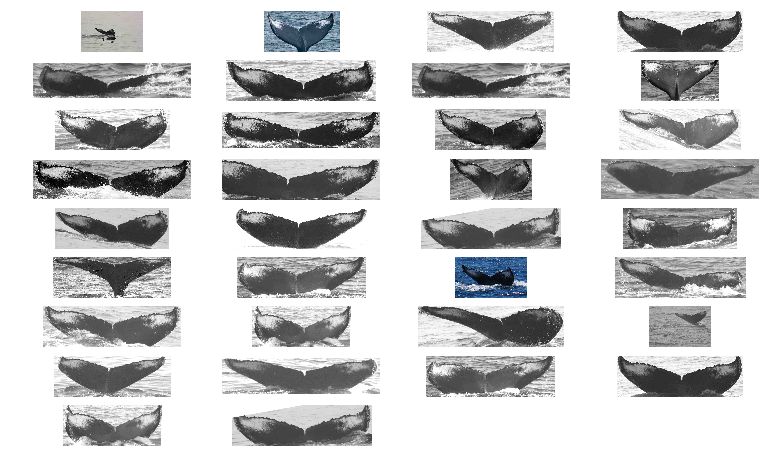

In [90]:
plot_image_for_filenames(list(w_1287fbc['Image']),None,rows=9)

['06f3adae.jpg', '088cc3cc.jpg', '13f88da0.jpg', '1f9081d6.jpg', '2065a907.jpg', '248dd355.jpg', '2f45cc3f.jpg', '3a659e09.jpg', '496b52ff.jpg', '49a20cb8.jpg', '54c9b3ed.jpg', '5d9fece1.jpg', '697705f2.jpg', '78c68f5a.jpg', '830efd45.jpg', '9cde75d8.jpg', 'a15de001.jpg', 'ad5cedb8.jpg', 'bd699c43.jpg', 'c0838719.jpg', 'c28e7910.jpg', 'd029ff80.jpg', 'd04d0fb8.jpg', 'd1fc97c1.jpg', 'd3b7513e.jpg', 'd86f3fec.jpg', 'ee3e0557.jpg']
(600, 1050, 3)
(652, 1000, 3)
(667, 1000, 3)
(345, 1050, 3)
(607, 1050, 3)
(700, 1050, 3)
(630, 1050, 3)
(700, 1050, 3)
(613, 1050, 3)
(325, 1050, 3)
(600, 1050, 3)
(688, 1050, 3)
(700, 1050, 3)
(571, 960, 3)
(274, 1050, 3)
(652, 1000, 3)
(700, 1050, 3)
(480, 640, 3)
(600, 1050, 3)
(302, 1050, 3)
(600, 1050, 3)
(700, 1050, 3)
(700, 1050, 3)
(454, 803, 3)
(600, 1050, 3)
(600, 1050, 3)
(700, 1050, 3)


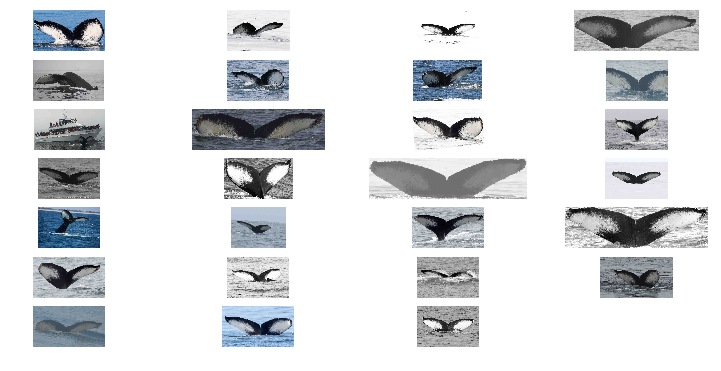

In [92]:
w_98baff9 = train_df[train_df['Id'] == 'w_98baff9']
plot_image_for_filenames(list(w_98baff9['Image']), None, rows=9)

['51933f50.jpg', '29348ce8.jpg', '08476cf8.jpg', '0841855c.jpg', '579ffeb4.jpg', '1eca0ace.jpg', 'bca5a2ec.jpg', 'b17f0dc0.jpg']
(525, 1050, 3)
(500, 700)
(572, 1050)
(587, 1050, 3)
(450, 1050, 3)
(417, 1050, 3)
(198, 987, 3)
(675, 1050)


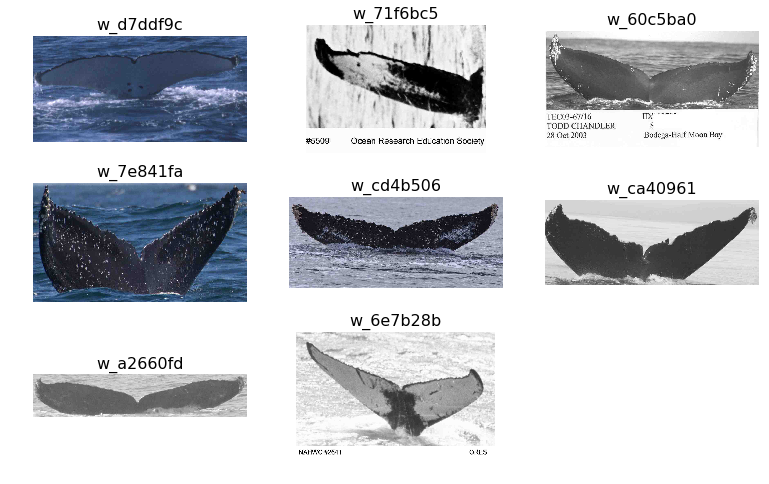

In [95]:
one_image_ids = train_df['Id'].value_counts().tail(8).keys()
one_image_filenames = []
labels = []
for i in one_image_ids:
    one_image_filenames.extend(list(train_df[train_df['Id'] == i]['Image']))
    labels.append(i)
    
plot_image_for_filenames(one_image_filenames, labels, rows=3)

In [96]:
def is_grey_scale(img_path):
    """Thanks to https://stackoverflow.com/questions/23660929/how-to-check-whether-a-jpeg-image-is-color-or-gray-scale-using-only-python-stdli"""
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

In [98]:
is_grey = [is_grey_scale('{0}/train/{1}'.format(INPUT_DIR,str(i))) for i in train_df['Image'].sample(frac=0.1)]
grey_perc = round(sum([i for i in is_grey]) / len([i for i in is_grey]) * 100, 2)
print("% of grey images: {grey_perc}",grey_perc)

% of grey images: {grey_perc} 47.31


In [101]:
print(len(is_grey))

985


In [104]:
img_sizes=Counter([Image.open('{0}/train/{1}'.format(INPUT_DIR,i)).size for i in train_df['Image']])

In [105]:
size,freq=zip(*Counter({i:v for i,v in img_sizes.items() if v>1}).most_common(20))

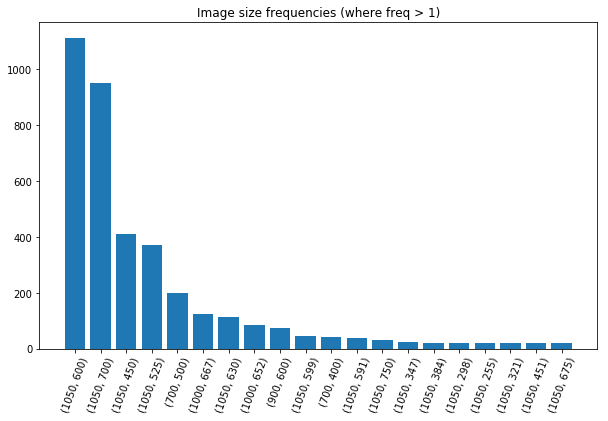

In [107]:
type(img_sizes)
plt.figure(figsize=(10, 6))

plt.bar(range(len(freq)), list(freq), align='center')
plt.xticks(range(len(size)), list(size), rotation=70)
plt.title("Image size frequencies (where freq > 1)")

plt.show()

In [108]:
from keras.preprocessing.image import (
    random_rotation, random_shift, random_shear, random_zoom,
    random_channel_shift, transform_matrix_offset_center, img_to_array)

Using TensorFlow backend.


<class 'numpy.ndarray'>


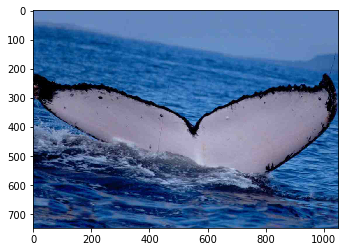

In [113]:
img = Image.open('{INPUT_DIR}/train/ff38054f.jpg'.format(INPUT_DIR=INPUT_DIR))
img_arr=img_to_array(img)
print(type(img_arr))
plt.imshow(img)

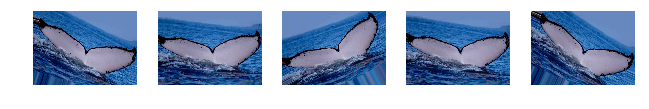

In [114]:
imgs = [
    random_rotation(img_arr, 30, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

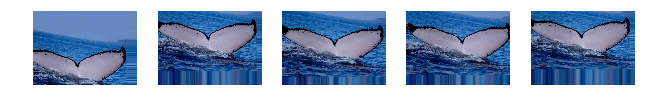

In [115]:
imgs = [
    random_shift(img_arr, wrg=0.1, hrg=0.3, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

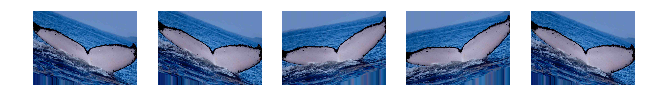

In [116]:
imgs = [
    random_shear(img_arr, intensity=0.4, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)

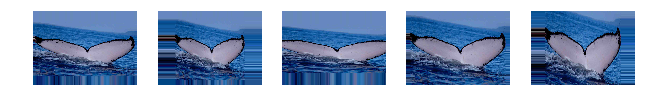

In [117]:

imgs = [
    random_zoom(img_arr, zoom_range=(1.5, 0.7), row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
plot_images(imgs, None, rows=1)


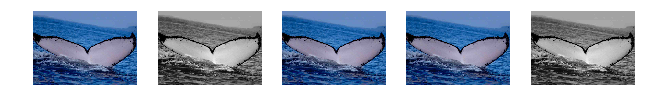

In [119]:
import random

def random_greyscale(img, p):
    if random.random() < p:
        return np.dot(img[...,:3], [0.299, 0.587, 0.114])
    
    return img

imgs = [
    random_greyscale(img_arr, 0.5) * 255
    for _ in range(5)]

plot_images(imgs, None, rows=1)

In [120]:
def augmentation_pipeline(img_arr):
    img_arr = random_rotation(img_arr, 18, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    img_arr = random_shear(img_arr, intensity=0.4, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    img_arr = random_zoom(img_arr, zoom_range=(0.9, 2.0), row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    img_arr = random_greyscale(img_arr, 0.4)

    return img_arr

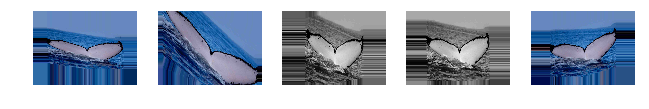

In [121]:


imgs = [augmentation_pipeline(img_arr) * 255 for _ in range(5)]
plot_images(imgs, None, rows=1)



In [133]:
a=5
b=a
print(a,b)
b=3
print(a,b)
a=6
print(a,b)

5 5
5 3
6 3


In [134]:
c=[1,2,3,4]
d=c
print(c,d)
c[0]=5
print(c,d)
d[0]=6
print(c,d)

[1, 2, 3, 4] [1, 2, 3, 4]
[5, 2, 3, 4] [5, 2, 3, 4]
[6, 2, 3, 4] [6, 2, 3, 4]


In [135]:
c=[1,2,3,4]
d=c[:]
print(c,d)
c[0]=5
print(c,d)
d[0]=6
print(c,d)

[1, 2, 3, 4] [1, 2, 3, 4]
[5, 2, 3, 4] [1, 2, 3, 4]
[5, 2, 3, 4] [6, 2, 3, 4]


In [141]:
c=[1,2,[1,2,3],3,4]
d=c[:] #  没有限制条件的分片表达式（L[:]）能够复制序列，但此法只能浅层复制; 在有嵌套情况跟着一起变化
print(c,d)
c[0]=5
c[2][0]=7
print(c,d)
d[0]=6
print(c,d)

[1, 2, [1, 2, 3], 3, 4] [1, 2, [1, 2, 3], 3, 4]
[5, 2, [7, 2, 3], 3, 4] [1, 2, [7, 2, 3], 3, 4]
[5, 2, [7, 2, 3], 3, 4] [6, 2, [7, 2, 3], 3, 4]


In [139]:
import copy
c=[1,2,3,4]
d=copy.deepcopy(c)
print(c,d)
c[0]=5
print(c,d)
d[0]=6
print(c,d)

[1, 2, 3, 4] [1, 2, 3, 4]
[5, 2, 3, 4] [1, 2, 3, 4]
[5, 2, 3, 4] [6, 2, 3, 4]


In [144]:
a = [0, [1, 2], 3]
b = a[:]
a[0] = 8
a[1][1] = 9
print(a,b)

[8, [1, 9], 3] [0, [1, 9], 3]


In [145]:
import copy

a = [0, [1, 2], 3]
b = copy.deepcopy(a)
a[0] = 8
a[1][1] = 9
print(a,b)

[8, [1, 9], 3] [0, [1, 2], 3]
